In [1]:
%load_ext autoreload
%autoreload 1
import numpy as np
import matplotlib.pyplot as plt
%aimport lusee_sky
from datetime import datetime
from datetime import timedelta
ls=lusee_sky

In [134]:
SCHROD_NORMAL = ls.lat_lon_to_rec(ls.SCHROD_LAT, ls.SCHROD_LON)
EQUATOR_NORMAL = ls.lat_lon_to_rec(0, ls.SCHROD_LON)

year = 2025
dt_hours = 0.5

utc_times = np.arange(
        datetime(year, 1, 1) - timedelta(days=20),
        datetime(year, 12, 1) + timedelta(days=50),
        timedelta(hours=dt_hours),
    ).astype(datetime)


In [135]:
ls.load_kernels()

In [136]:
dot_schrod = ls.get_body_cosine(ls.SUN, utc_times)
dot_eq = ls.get_body_cosine(ls.SUN, utc_times, EQUATOR_NORMAL)

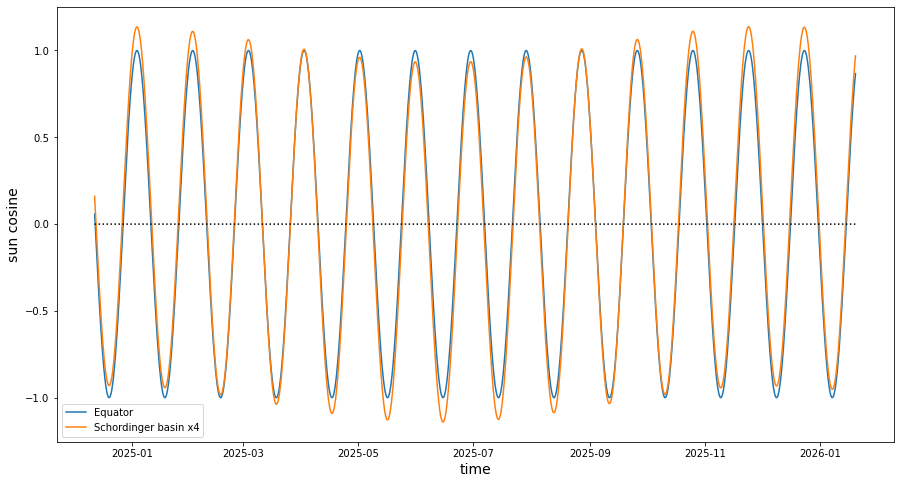

In [195]:
plt.figure(figsize=(15,8))
plt.plot(utc_times,dot_eq,label='Equator')
plt.plot(utc_times,dot_schrod*4,label='Schordinger basin x4')
plt.plot(utc_times,np.zeros(len(utc_times)),'k:')
plt.xlabel('time',fontsize=14)
plt.ylabel('sun cosine',fontsize=14)
plt.legend()


In [137]:
def simulate_battery (times, sun_cosine, 
                      dt = dt_hours, ## in hours,
                      capacity = 6500, ## Wh
                      load=20, #W
                      pv_A = 0.5, #m2
                      pv_effic = 0.3):
    out_charge = []
    charge = capacity
    for cosine in sun_cosine:
        charge -= load * dt
        if cosine>0:
            charge += pv_A*pv_effic * 1000 * dt * cosine
        if charge<0:
            charge=0
        if charge>capacity:
            charge=capacity
        out_charge.append(charge)
    return np.array(out_charge)

In [189]:
bat_eq=simulate_battery(utc_times,dot_eq,load=16,pv_A=0.18)
bat_schrod=simulate_battery(utc_times,dot_schrod,load=16,pv_A=0.8)

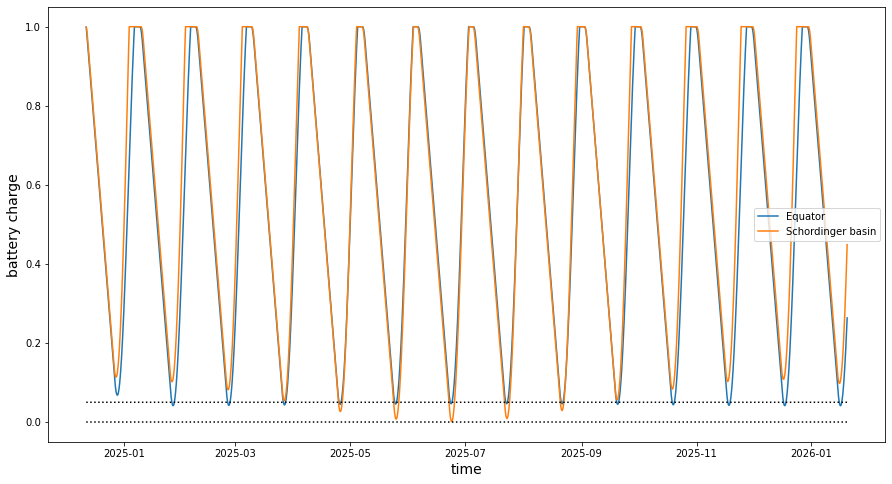

In [196]:
plt.figure(figsize=(15,8))
plt.plot(utc_times,bat_eq/6500,label='Equator')
plt.plot(utc_times,bat_schrod/6500,label='Schordinger basin')
plt.plot(utc_times,np.zeros(len(utc_times)),'k:')
plt.plot(utc_times,0.05*np.ones(len(utc_times)),'k:')
plt.xlabel('time',fontsize=14)
plt.ylabel('battery charge',fontsize=14)
plt.legend()
